In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [ ]:
# '围网', '拖网', '刺网'

In [32]:
type_dict = {'围网':'wei','拖网':'tuo','刺网':'ci'}

In [2]:
train = pd.read_hdf('../input/train.h5')

In [52]:
t = train[train['ship']==2963]

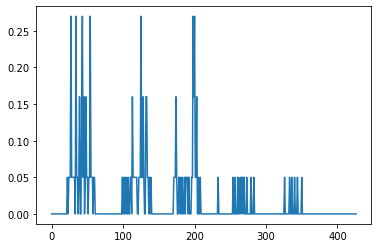

In [54]:
plt.plot(t['v'])

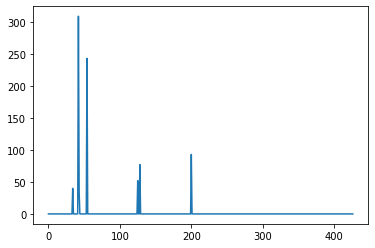

In [53]:
plt.plot(t['d'])

In [45]:
def show_path(type_name):
    ids = train[train['type']==type_name]['ship'].unique()
    ids = [ids[np.random.randint(len(ids))] for x in range(10)]
    t = train[train['ship'].isin(ids)]

    f, ax = plt.subplots(5,2, figsize=(8,20))
    for index, cur_id in enumerate(ids):
        cur = t[t['ship']==cur_id]
        i = index//2
        j = index % 2
        ax[i,j].plot(cur['x'], cur['y'])
#         if i==0 and j==0:
        ax[i,j].set_title(cur_id)

In [50]:
train[train['ship']==2963]

,ship,x,y,v,d,time,type
0,2963,6.315982e+06,5.291346e+06,0.00,0,1120 23:57:26,围网
1,2963,6.315982e+06,5.291346e+06,0.00,0,1120 23:47:26,围网
2,2963,6.315982e+06,5.291346e+06,0.00,0,1120 23:37:26,围网
3,2963,6.315982e+06,5.291346e+06,0.00,0,1120 23:27:26,围网
4,2963,6.315982e+06,5.291346e+06,0.00,0,1120 23:17:26,围网
5,2963,6.315982e+06,5.291346e+06,0.00,0,1120 23:07:26,围网
6,2963,6.315982e+06,5.291346e+06,0.00,0,1120 22:57:26,围网
7,2963,6.315982e+06,5.291346e+06,0.00,0,1120 22:47:26,围网
8,2963,6.315982e+06,5.291346e+06,0.00,0,1120 22:37:26,围网
9,2963,6.315982e+06,5.291346e+06,0.00,0,1120 22:27:26,围网


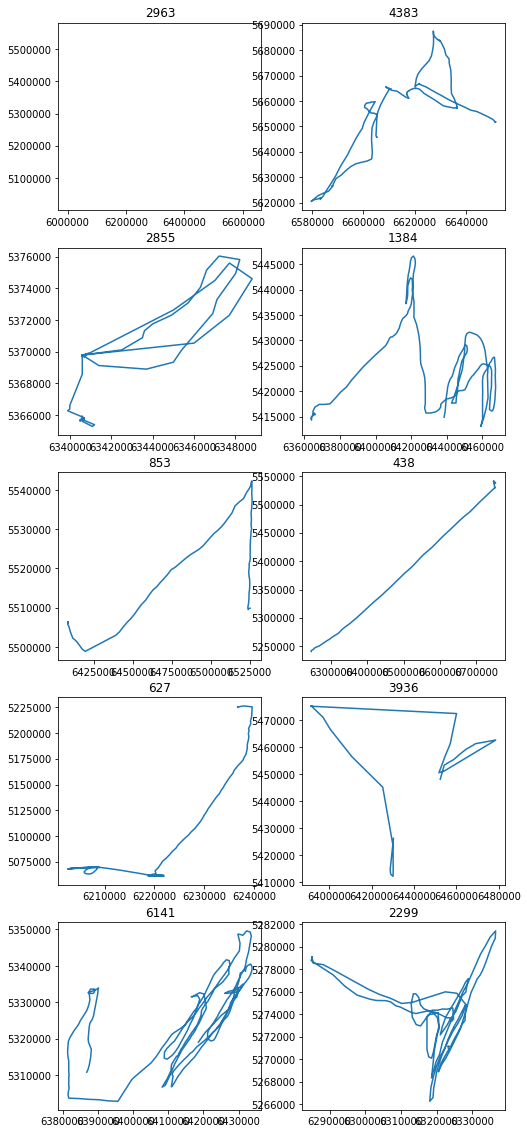

In [46]:
show_path('围网')

In [51]:
train[train['ship']==4022]

,ship,x,y,v,d,time,type
0,4022,6.102550e+06,5.112648e+06,0.00,0,1120 23:55:45,拖网
1,4022,6.102550e+06,5.112648e+06,0.00,0,1120 23:45:45,拖网
2,4022,6.102550e+06,5.112648e+06,0.00,0,1120 23:35:45,拖网
3,4022,6.102550e+06,5.112648e+06,0.00,0,1120 23:25:45,拖网
4,4022,6.102550e+06,5.112648e+06,0.00,0,1120 23:15:45,拖网
5,4022,6.102550e+06,5.112648e+06,0.00,0,1120 23:06:43,拖网
6,4022,6.102550e+06,5.112648e+06,0.00,0,1120 22:55:45,拖网
7,4022,6.102550e+06,5.112648e+06,0.00,0,1120 22:45:45,拖网
8,4022,6.102550e+06,5.112648e+06,0.00,0,1120 22:35:45,拖网
9,4022,6.102550e+06,5.112648e+06,0.00,0,1120 22:25:46,拖网


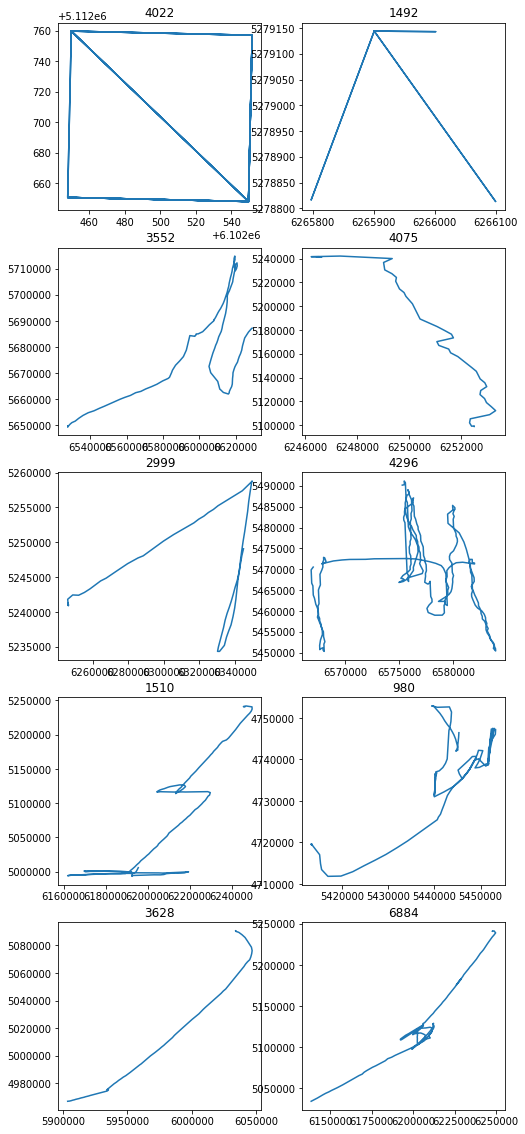

In [47]:

show_path('拖网')

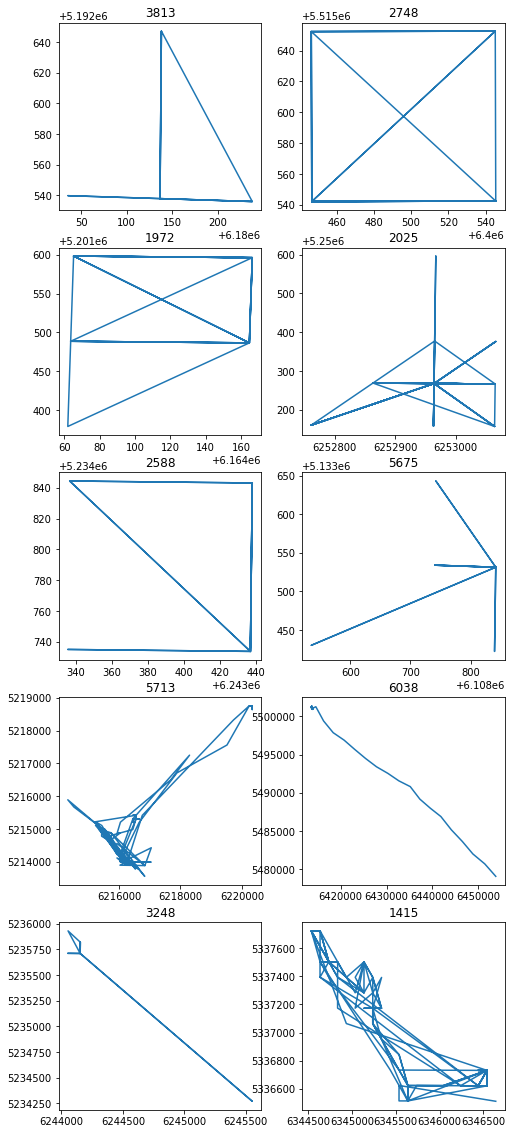

In [48]:
show_path('刺网')

In [49]:
train[train['ship']==1415]

,ship,x,y,v,d,time,type
0,1415,6.346640e+06,5.336511e+06,0.22,102,1110 11:54:35,刺网
1,1415,6.346640e+06,5.336511e+06,0.11,0,1110 11:44:35,刺网
2,1415,6.346640e+06,5.336511e+06,0.11,0,1110 11:34:35,刺网
3,1415,6.345538e+06,5.336624e+06,2.70,5,1110 11:24:33,刺网
4,1415,6.345538e+06,5.336514e+06,0.49,0,1110 11:14:32,刺网
5,1415,6.345538e+06,5.336514e+06,0.81,50,1110 11:04:57,刺网
6,1415,6.345638e+06,5.336514e+06,1.51,1,1110 10:44:28,刺网
7,1415,6.345438e+06,5.336734e+06,7.50,135,1110 10:34:32,刺网
8,1415,6.344638e+06,5.337504e+06,0.49,222,1110 10:24:31,刺网
9,1415,6.344738e+06,5.337504e+06,0.81,81,1110 10:14:47,刺网
